In [1]:
#!/usr/bin/python

In [2]:
!git clone https://github.com/st1800eafit/st1800_20211.git
!pip install nltk
!pip install stop-words

Cloning into 'st1800_20211'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 197 (delta 32), reused 83 (delta 19), pack-reused 100
Receiving objects: 100% (197/197), 118.14 MiB | 35.51 MiB/s, done.
Resolving deltas: 100% (36/36), done.
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32917 sha256=dbf945565668ee848676a62c15920c8503aaf9b72b83d9ac109db7abcf7ead45
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [3]:
# Importamos librerias necesarias
import os
import glob
import re 
import nltk # Solo para representar los 20 tokens mas representados
import matplotlib.pyplot as plt

In [4]:
# Importamos los documentos de entrada para trabajar
files_location = os.path.join("/","content","st1800_20211","datasets", "papers_sample_pdf/")
output_path = "./out/"
output_file = "text_prep.txt"
print(files_location)

/content/st1800_20211/datasets/papers_sample_pdf/


In [5]:
# Abrimos los documentos con extensiones .txt. Una vez tenemos todos los nombres de los documentos, los abrimos y adicionamos a la variable corpus
filenames = glob.glob(files_location+"*.txt")
corpus = ""
for file in filenames:
  corpus += open(file, "r").read()

In [6]:
# Abrimos el .xml. Primero tenemos que limpiar el xml de etiquetas, para luego agregarlo al corpus
filename_xml = glob.glob(files_location+"*.xml")
xml_file = open (filename_xml[0], "r").read()
xml_file = re.sub('<[^>]*>', "", xml_file)
corpus += xml_file

En este caso tenemos un total de: 269148
numero de palabras finales =  55241
[('the', 10955), ('of', 8666), ('and', 5836), ('a', 4841), ('to', 3756), ('is', 3627), ('in', 3621), ('', 3135), ('for', 2876), ('that', 2391), ('-', 2018), ('with', 1741), ('we', 1723), ('on', 1653), ('Computer', 1623), ('Science', 1482), ('We', 1269), ('are', 1245), ('by', 1232), ('this', 1181)]


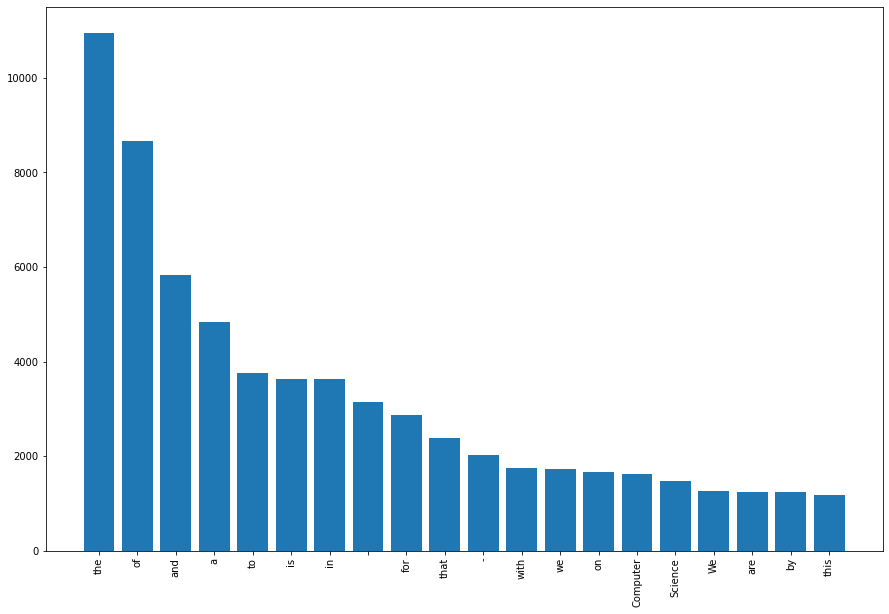

In [7]:
# Una vez tenemos todos todas las lineas de texto abiertas, podemos proceder a tokenizar por medio de python puro
tokens_python = corpus.split(' ')
print("En este caso tenemos un total de: "+ str(len(tokens_python)))
fdist = nltk.FreqDist(tokens_python)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [8]:
# Filtro 1 : El primer filtro para aplicar son los stop words. Primero nos encargaremos de importarlos
from stop_words import get_stop_words
stop_words = get_stop_words('english')
print("La cantidad de stop words que tenemos, son los siguientes: "+str(len(stop_words)))
print(stop_words)

La cantidad de stop words que tenemos, son los siguientes: 174
['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that

En este caso tenemos un total de: 269148
numero de palabras finales =  42549
[('', 14246), ('the', 10996), ('of', 8700), ('and', 5917), ('a', 4892), ('to', 3782), ('in', 3704), ('is', 3677), ('for', 2908), ('that', 2473), ('with', 1769), ('we', 1726), ('on', 1705), ('Computer', 1624), ('Science', 1613), ('We', 1284), ('are', 1254), ('by', 1245), ('this', 1208), ('as', 1159)]


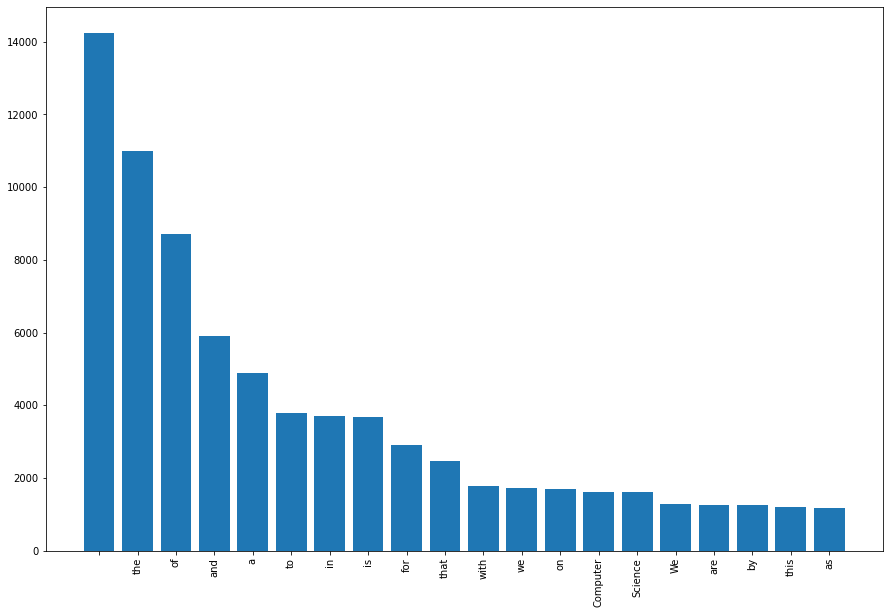

In [9]:
# Filtro 3 : Filtramos por expresion regular, para quitar los signos de puntuacion
tokens_python = [re.sub(r'[^A-Za-z0-9]+','',token) for token in tokens_python]
print("En este caso tenemos un total de: "+ str(len(tokens_python)))
fdist = nltk.FreqDist(tokens_python)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

En este caso tenemos un total de: 238439
numero de palabras finales =  39108
[('the', 12090), ('of', 8702), ('and', 5931), ('in', 4526), ('to', 3896), ('is', 3680), ('for', 3173), ('we', 3010), ('that', 2487), ('on', 1841), ('with', 1804), ('this', 1716), ('computer', 1657), ('science', 1628), ('by', 1294), ('as', 1278), ('are', 1256), ('an', 1193), ('be', 1047), ('text', 1030)]


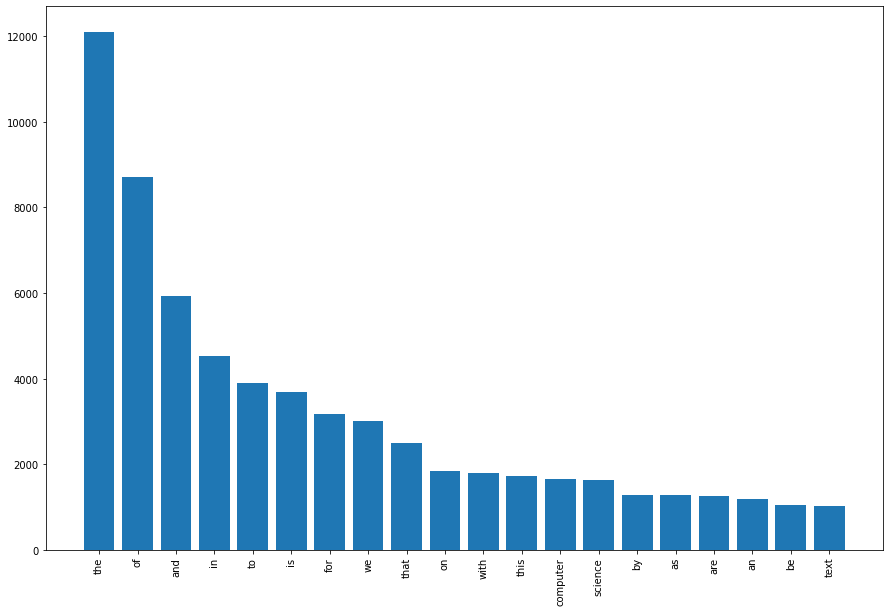

In [10]:
# Filtro 2 : Filtramos por longitud palabra y los ponemos en minuscula
tokens_python = [token.lower() for token in tokens_python if len(token) > 1]
print("En este caso tenemos un total de: "+ str(len(tokens_python)))
fdist = nltk.FreqDist(tokens_python)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

En este caso tenemos un total de: 164135
numero de palabras finales =  38995
[('computer', 1657), ('science', 1628), ('text', 1030), ('cs', 997), ('can', 835), ('comment', 657), ('theory', 648), ('information', 639), ('data', 599), ('algorithm', 594), ('problem', 571), ('paper', 522), ('algorithms', 500), ('mathematics', 484), ('time', 483), ('also', 469), ('show', 465), ('pages', 463), ('using', 443), ('number', 428)]


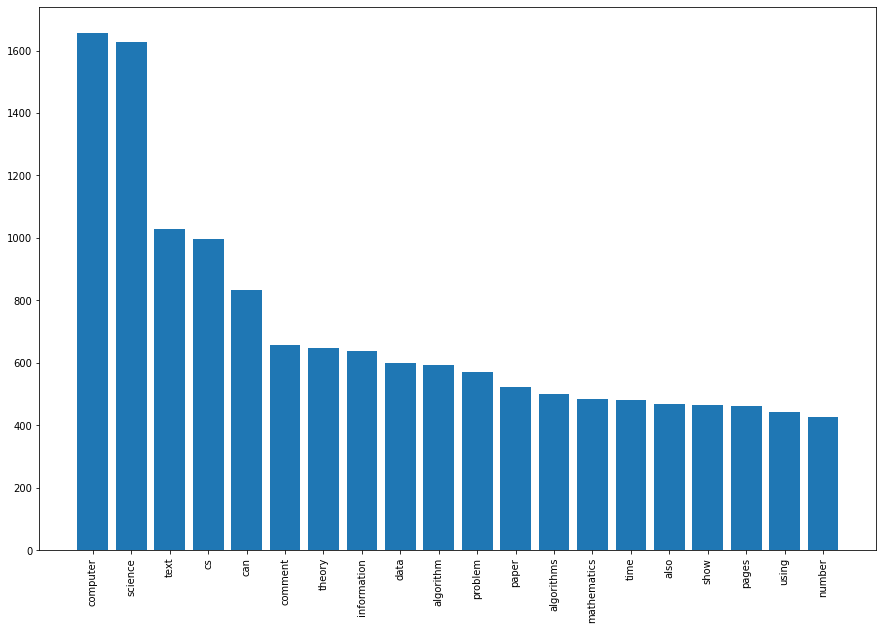

In [11]:
# Filtramos las palabras con los stop words necesarios
tokens_python = [token for token in tokens_python if token not in stop_words]
print("En este caso tenemos un total de: "+ str(len(tokens_python)))
fdist = nltk.FreqDist(tokens_python)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [12]:
print("En este caso el numero optimo de stop_words encontrados seria: "+str(len(tokens_python))+" debido a que las tecnicas de Stemming y Lemmatization no puede ser utilizadas en Python puro")

En este caso el numero optimo de stop_words encontrados seria: 164135 debido a que las tecnicas de Stemming y Lemmatization no puede ser utilizadas en Python puro
